# Disciple - 取引シミュレーション（Jupyter用）

In [1]:
import datetime
import os
import re

import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata

from funcs.conv import conv_transaction_df2html
from funcs.setting import load_setting
from funcs.tide import get_year_date_str_from_file
from funcs.tse import get_ticker_name_list
from modules.disciple import Disciple
from structs.res import AppRes

In [2]:
res = AppRes()

excel = "ticks_20260113.xlsx"
code = "7011"
# code = "7203"
# code = "8306"
dict_setting = load_setting(res, code)
THRESHOLD_SLOPE = dict_setting["THRESHOLD_SLOPE"]
TURBULENCE = dict_setting["TURBULENCE"]
date_str = get_year_date_str_from_file(excel)
print(date_str)

app = Disciple(excel, code, dict_setting)
app.run()

2026/0113
パラメータ
PERIOD_WARMUP : 180
PERIOD_MA_1 : 170
PERIOD_MA_2 : 500
PERIOD_SLOPE : 5
THRESHOLD_SLOPE : 0.05
PERIOD_RR : 30
TURBULENCE : 35.0
LOSSCUT_1 : -25


In [13]:
# 取引明細
df_transaction = app.getTransaction()
print("取引明細")
print(df_transaction)
print(df_transaction["注文日時"].dtype)

list_html = conv_transaction_df2html(df_transaction)
filename = os.path.join("output", f"{date_str}_{code}_transaction.html")
print(filename)
with open(filename, mode="w") as f:
    f.write("\n".join(list_html))

list_trans = df_transaction["注文日時"]
n_trade = len(df_transaction)
total = df_transaction["損益"].sum()
print(f"取引回数: {n_trade} 回 / 総収益: {total} 円/株")

取引明細
    注文番号                          注文日時 銘柄コード  売買  約定単価  約定数量      損益 備考
0      1 2026-01-13 09:09:50.084072113  7011  買建  4447   100     NaN   
1      2 2026-01-13 09:10:34.175789118  7011  売埋  4422   100 -2500.0   
2      3 2026-01-13 09:29:12.460344076  7011  売建  4409   100     NaN   
3      4 2026-01-13 09:33:25.095338106  7011  買埋  4421   100 -1200.0   
4      5 2026-01-13 09:33:26.100450993  7011  買建  4423   100     NaN   
5      6 2026-01-13 09:38:36.879946947  7011  売埋  4412   100 -1100.0   
6      7 2026-01-13 09:38:37.885987043  7011  売建  4414   100     NaN   
7      8 2026-01-13 09:57:45.010251999  7011  買埋  4383   100  3100.0   
8      9 2026-01-13 09:57:46.001971006  7011  買建  4383   100     NaN   
9     10 2026-01-13 10:03:37.705154896  7011  売埋  4376   100  -700.0   
10    11 2026-01-13 10:15:41.253031015  7011  買建  4375   100     NaN   
11    12 2026-01-13 10:20:07.970334053  7011  売埋  4370   100  -500.0   
12    13 2026-01-13 10:48:15.725090027  7011  売建  4409   10

In [4]:
# 収益トレンド


取引回数: 28 回 / 総収益: 3500.0 円/株


In [5]:
# テクニカル指標
print("テクニカル指標")
df_tech = app.getTechnicals()
print(df_tech)

テクニカル指標
                               ts  price          ma1          ma2    slope1  \
2026-01-13 09:06:01  1.768263e+09   4445  4445.000000  4445.000000  0.000000   
2026-01-13 09:06:02  1.768263e+09   4445  4445.000000  4445.000000  0.000000   
2026-01-13 09:06:03  1.768263e+09   4447  4445.666667  4445.666667  0.400000   
2026-01-13 09:06:04  1.768263e+09   4447  4446.000000  4446.000000  0.380952   
2026-01-13 09:06:05  1.768263e+09   4442  4445.200000  4445.200000  0.011111   
...                           ...    ...          ...          ...       ...   
2026-01-13 15:24:45  1.768285e+09   4468  4472.835294  4473.856000  0.030980   
2026-01-13 15:24:46  1.768285e+09   4466  4472.794118  4473.840000  0.035686   
2026-01-13 15:24:46  1.768285e+09   4466  4472.752941  4473.824000  0.039020   
2026-01-13 15:24:48  1.768285e+09   4467  4472.711765  4473.810000  0.040392   
2026-01-13 15:24:49  1.768285e+09   4467  4472.670588  4473.798000  0.041176   

                     rr  profit

In [6]:
df_tech["slope1"].describe()

count    19088.000000
mean         0.033119
std          0.038411
min          0.000000
25%          0.010980
50%          0.023529
75%          0.045882
max          1.619206
Name: slope1, dtype: float64

In [7]:
FONT_PATH = "fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()

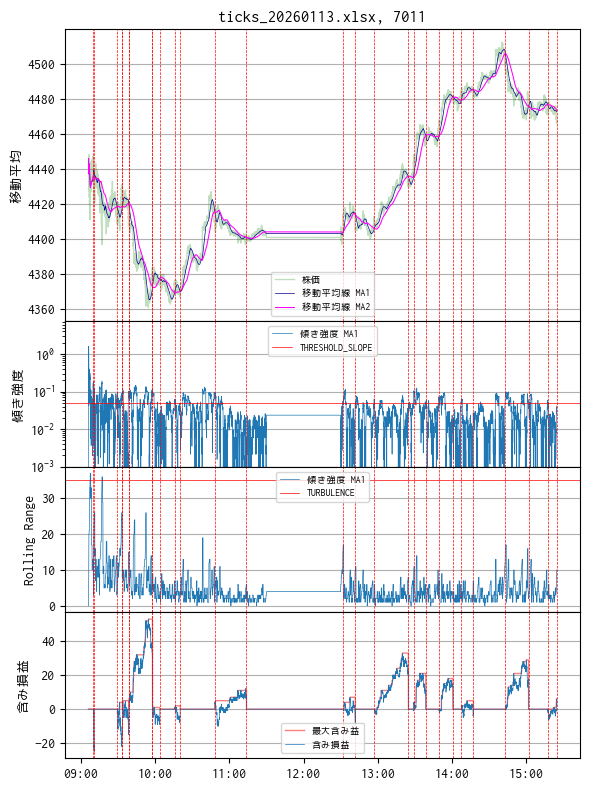

In [8]:
fig = plt.figure(figsize=(6, 8))
n = 4
ax = dict()
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[2 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid(axis="y")

ax[0].set_title(f"{excel}, {code}")
ax[0].plot(df_tech["price"], linewidth=1, color="green", alpha=0.25, label="株価")
ax[0].plot(df_tech["ma1"], linewidth=0.5, color="darkblue", label="移動平均線 MA1")
ax[0].plot(df_tech["ma2"], linewidth=0.75, color="magenta", label="移動平均線 MA2")
ax[0].set_ylabel("移動平均")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax[0].legend(fontsize=7)

ax[1].plot(df_tech["slope1"], linewidth=0.5, label="傾き強度 MA1")
ax[1].axhline(y=THRESHOLD_SLOPE, color="red", linewidth=0.5, label="THRESHOLD_SLOPE")
ax[1].set_yscale("log")
ax[1].set_ylabel("傾き強度")
ax[1].legend(fontsize=7)
_, y_high = ax[1].get_ylim()
ax[1].set_ylim(0.001, y_high)

ax[2].plot(df_tech["rr"], linewidth=0.5, label="傾き強度 MA1")
ax[2].axhline(y=TURBULENCE, color="red", linewidth=0.5, label="TURBULENCE")
ax[2].set_ylabel("Rolling Range")
ax[2].legend(fontsize=7)

ax[3].plot(
    df_tech["profit_max"], linewidth=1, color="red", alpha=0.5, label="最大含み益"
)
ax[3].plot(df_tech["profit"], linewidth=0.5, color="C0", label="含み損益")
ax[3].set_ylabel("含み損益")
ax[3].legend(fontsize=7)

for i in range(n):
    for t in list_trans:
        ax[i].axvline(x=t, color="red", linestyle="dashed", linewidth=0.5)

plt.tight_layout()
# output = os.path.join("output", f"{date_str}_{code}_trend_technical.png")
output = os.path.join("tmp", f"{date_str}_{code}_trend_technical.png")
plt.tight_layout()
plt.savefig(output)
plt.show()

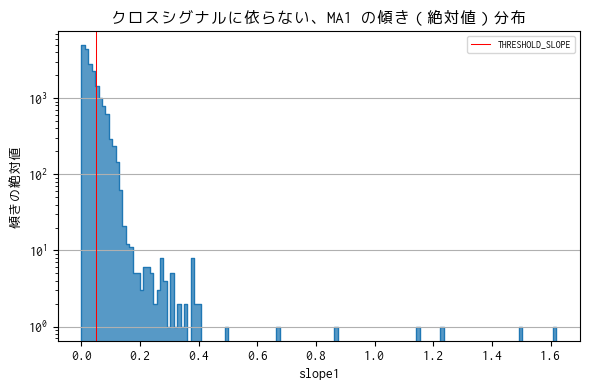

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("クロスシグナルに依らない、MA1 の傾き（絶対値）分布")
sns.histplot(data=df_tech, x="slope1", bins="sqrt", element="step")
ax.axvline(x=THRESHOLD_SLOPE, color="red", linewidth=0.75, label="THRESHOLD_SLOPE")
ax.set_yscale("log")
ax.set_ylabel("傾きの絶対値")
ax.grid(axis="y")
ax.legend(fontsize=7)

plt.tight_layout()
# output = os.path.join("output", f"{date_str}_{code}_trend_technical.png")
output = os.path.join("tmp", f"{date_str}_{code}_hist_slope.png")
plt.savefig(output)
plt.show()

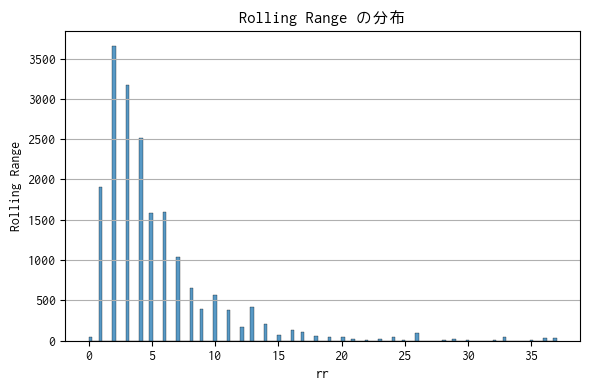

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_title("Rolling Range の分布")
sns.histplot(data=df_tech, x="rr", bins="sqrt")
# ax.axvline(x=THRESHOLD_SLOPE, color="red", linewidth=0.75, label="THRESHOLD_SLOPE")
# ax.set_yscale("log")
ax.set_ylabel("Rolling Range")
ax.grid(axis="y")
# ax.legend(fontsize=7)

plt.tight_layout()
# output = os.path.join("output", f"{date_str}_{code}_trend_technical.png")
output = os.path.join("tmp", f"{date_str}_{code}_hist_rr.png")
plt.savefig(output)
plt.show()

In [11]:
# 観測値
print("観測値")
df_obs = app.getObservations()
print(df_obs)

観測値
                     クロスS1  クロスS2  クロ強  乱高下  ロス1   建玉
2026-01-13 09:06:01    0.0    0.0  0.0  0.0  0.0  0.0
2026-01-13 09:06:02    0.0    0.0  0.0  0.0  0.0  0.0
2026-01-13 09:06:03    0.0    0.0  0.0  0.0  0.0  0.0
2026-01-13 09:06:04    0.0    0.0  0.0  0.0  0.0  0.0
2026-01-13 09:06:05    0.0    0.0  0.0  0.0  0.0  0.0
...                    ...    ...  ...  ...  ...  ...
2026-01-13 15:24:45    0.0    0.0  0.0  0.0  0.0 -1.0
2026-01-13 15:24:46    0.0    0.0  0.0  0.0  0.0 -1.0
2026-01-13 15:24:46    0.0    0.0  0.0  0.0  0.0 -1.0
2026-01-13 15:24:48    0.0    0.0  0.0  0.0  0.0 -1.0
2026-01-13 15:24:49    0.0    0.0  0.0  0.0  0.0 -1.0

[19088 rows x 6 columns]


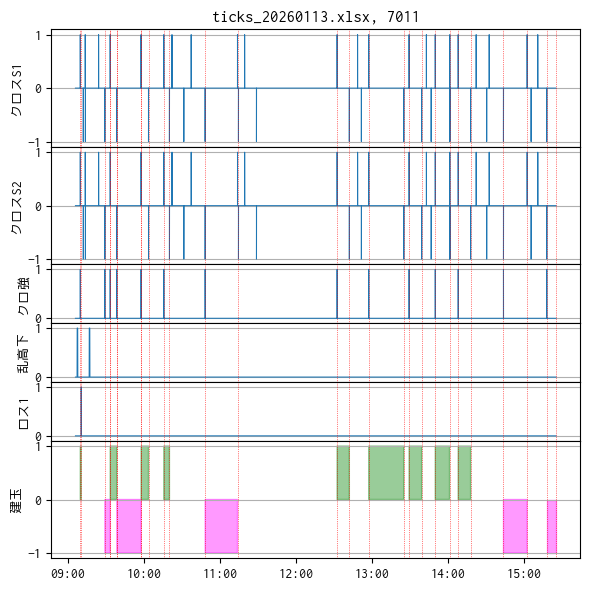

In [12]:
n = len(df_obs.columns)
fig = plt.figure(figsize=(6, n))
ax = dict()

targets = {"クロスS1", "クロスS2", "建玉"}
list_height_ratio = [2 if col in targets else 1 for col in df_obs.columns]
gs = fig.add_gridspec(n, 1, wspace=0.0, hspace=0.0, height_ratios=list_height_ratio)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid(axis="y")

ax[0].set_title(f"{excel}, {code}")

special_cross = {"クロスS1", "クロスS2"}

for i, colname in enumerate(df_obs.columns):
    ax_i = ax[i]

    if colname in special_cross:
        ax_i.plot(df_obs[colname], linewidth=0.75)
        ax_i.set_ylim(-1.1, 1.1)

    elif colname == "建玉":
        x = df_obs.index
        y = df_obs[colname]
        ax_i.fill_between(
            x, 0, y, where=y > 0, color="green", alpha=0.4, interpolate=True
        )
        ax_i.fill_between(
            x, 0, y, where=y < 0, color="magenta", alpha=0.4, interpolate=True
        )
        ax_i.set_ylim(-1.1, 1.1)

    else:
        ax_i.plot(df_obs[colname], linewidth=0.75)
        ax_i.set_ylim(-0.1, 1.1)

    ax_i.set_ylabel(colname)
    ax_i.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

for i in range(n):
    for t in list_trans:
        ax[i].axvline(x=t, color="red", linestyle="dotted", linewidth=0.5)

plt.tight_layout()
# output = os.path.join("output", f"{date_str}_{code}_trend_obs.png")
output = os.path.join("tmp", f"{date_str}_{code}_trend_obs.png")
plt.tight_layout()
plt.savefig(output)
plt.show()